# TITLE: BEST OIL WELL PREDICTION

# Itroduction

**During the course of this project, with data on oil well in some selected regions,we will assert location for future oil well.**
**We will also build model for predicting volume of reserve in wells, assessing the profitability and the risk factor for** **existing and potential new oil well project.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# REGION_0

In [2]:
df_r0 = pd.read_csv('/datasets/geo_data_0.csv') # from the cloud / triipleten
df_r0 = df_r0.drop(['id'], axis=1)
display(df_r0.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [3]:
df_r0.info()
duplicates = df_r0.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


0

# Let's analyze the distributions of the above dataframe

# Region_0

In [4]:
#Let calculate summary statistics for each numerical column
summary_stats_0 = df_r0.describe().T[['mean', '50%', 'std']]
#(50% is the default name for median in describe())
summary_stats_0.rename(columns={'50%': 'median'}, inplace=True)
display(summary_stats_0)

,mean,median,std
f0,0.500419,0.502360,0.871832
f1,0.250143,0.250252,0.504433
f2,2.502647,2.515969,3.248248
product,92.500000,91.849972,44.288691


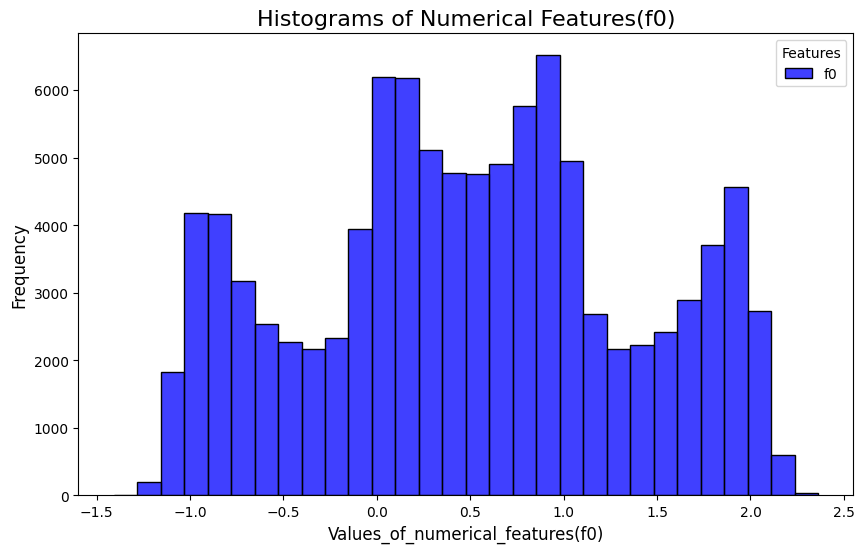

In [5]:
# an overview of the distributions of numerical column (f0).
plt.figure(figsize=(10, 6))

columns = ['f0']


colors = ['blue']

# histograms  
for column in columns:
    sns.histplot(df_r0[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f0)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f0)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

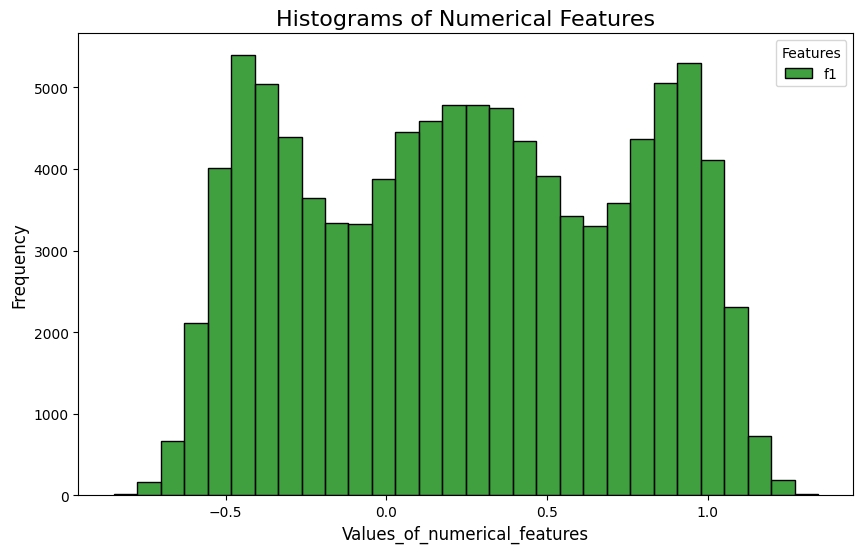

In [6]:
# an overview of the distributions of each numerical column ( f1).
plt.figure(figsize=(10, 6))

columns = ['f1']


colors = ['green']

# histograms 
for column in columns:
    sns.histplot(df_r0[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features', fontsize=16)
plt.xlabel('Values_of_numerical_features', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

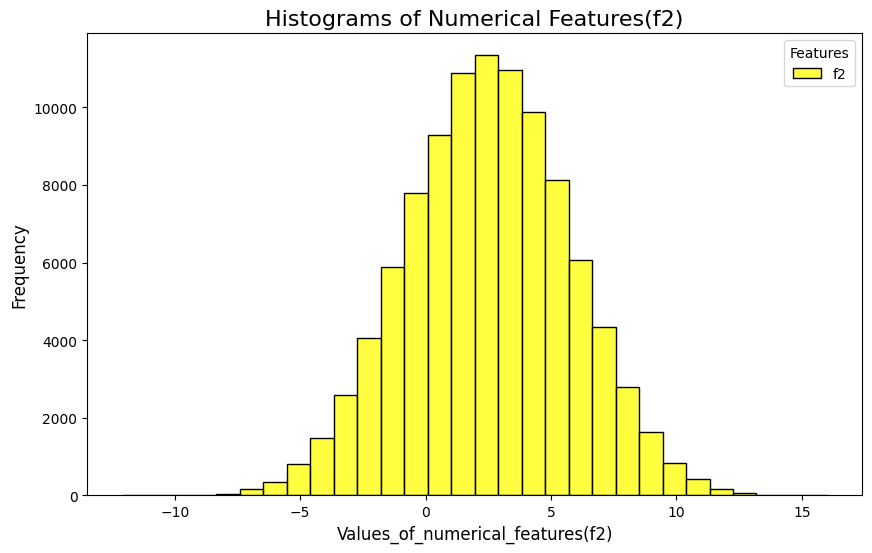

In [7]:
# an overview of the distributions of each numerical column ( f2).
plt.figure(figsize=(10, 6))

columns = ['f2']


colors = ['yellow']

# histograms 
for column in columns:
    sns.histplot(df_r0[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f2)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f2)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

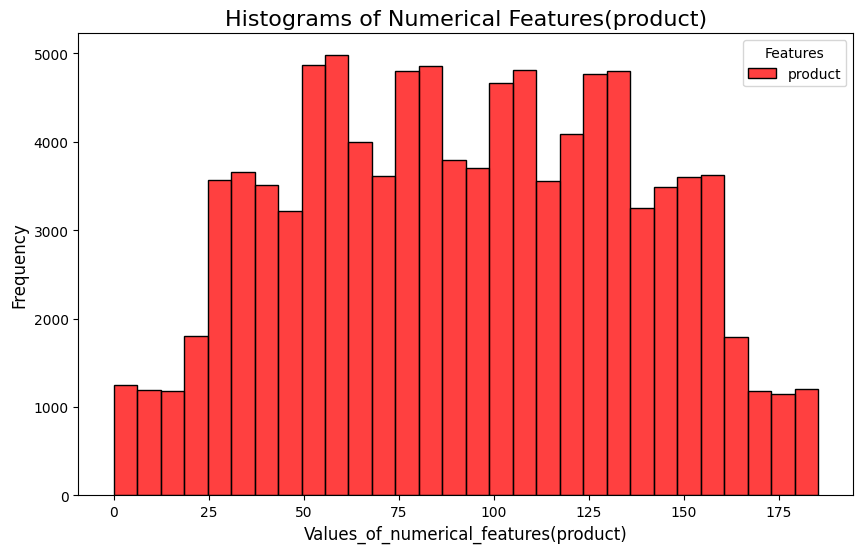

In [8]:
# an overview of the distributions of each numerical column ( product).
plt.figure(figsize=(10, 6))

columns = ['product']


colors = ['red']

# histograms 
for column in columns:
    sns.histplot(df_r0[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(product)', fontsize=16)
plt.xlabel('Values_of_numerical_features(product)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

**The distribution indicate here that for f0,f1 the average value is low, just above 0 and f2 is much higher than f0 and f1, indicating that the scale of values for f2 is larger.We also notice that the median for f0, f1 and f2 is almost identical to the mean.f2 has the largest variability among the features(f0,f1)indicating a wide spread of values.**
**The feature product indicate a median is slightly higher than the mean, which may indicate a slight left skew in the distribution of the product and there is considerable variability in the product values, indicating that the product values are spread out from the mean.**


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Good! 
    
</div>

# REGION_1

In [9]:
df_r1 = pd.read_csv('/datasets/geo_data_1.csv')
df_r1 = df_r1.drop(['id'], axis=1)
df_r1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [10]:
df_r1.info()
duplicates = df_r1.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


0

# Let's analyze the distributions of the above dataframe

In [11]:
#Let calculate summary statistics for each numerical column
summary_stats_1 = df_r1.describe().T[['mean', '50%', 'std']]#(.T)transposes the result,switching rows and columns.In this case,
#the column labels(mean, std)become rows and each statistical measure becomes a column.#(50% is the default name for median in describe())
summary_stats_1.rename(columns={'50%': 'median'}, inplace=True)
display(summary_stats_1)

,mean,median,std
f0,1.141296,1.153055,8.965932
f1,-4.796579,-4.813172,5.119872
f2,2.494541,2.011479,1.703572
product,68.825000,57.085625,45.944423


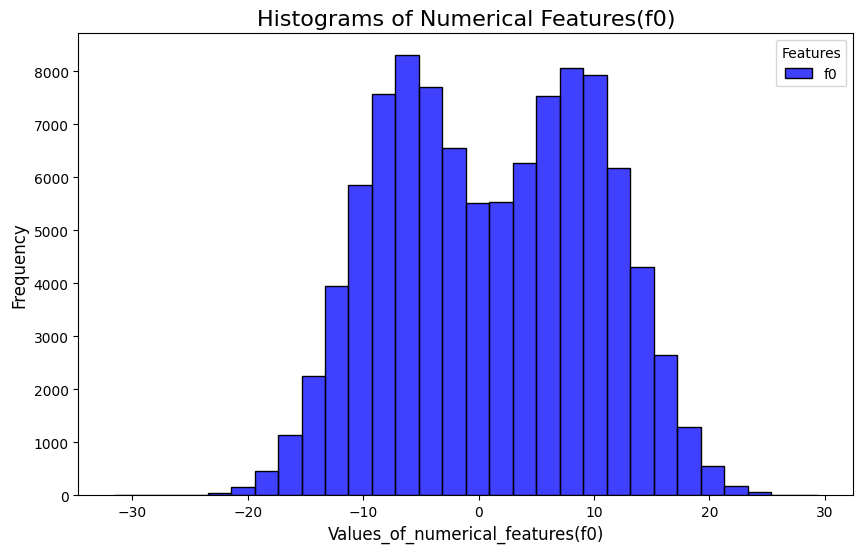

In [12]:
# an overview of the distributions of numerical column ( f0).
plt.figure(figsize=(10, 6))

columns = ['f0']


colors = ['blue']

# histograms 
for column in columns:
    sns.histplot(df_r1[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f0)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f0)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

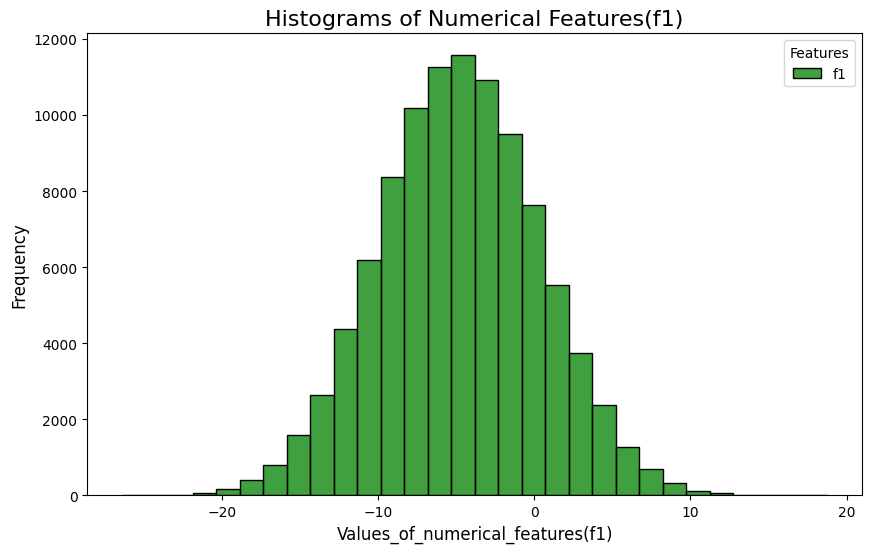

In [13]:
# an overview of the distributions of numerical column ( f1).
plt.figure(figsize=(10, 6))

columns = ['f1']


colors = ['green']

# histograms 
for column in columns:
    sns.histplot(df_r1[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f1)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

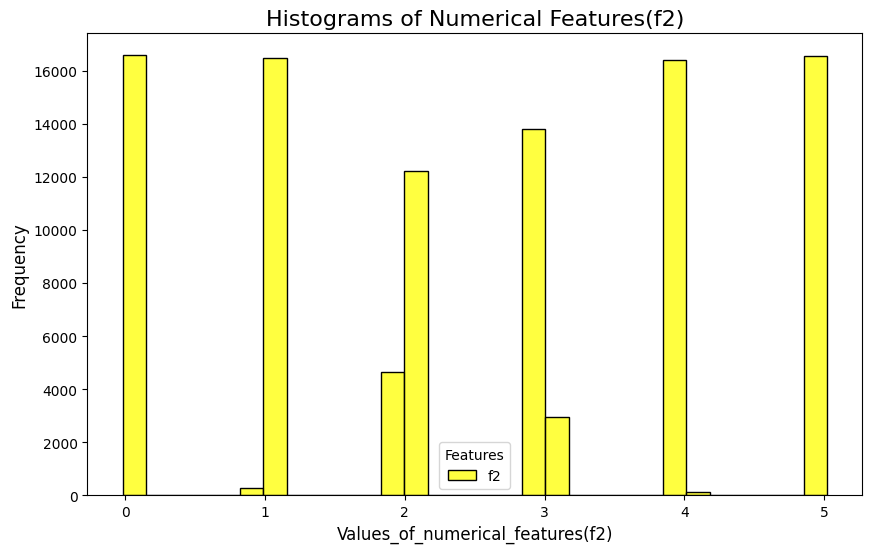

In [14]:
# an overview of the distributions of numerical column ( f2).
plt.figure(figsize=(10, 6))

columns = ['f2']


colors = ['yellow']

# histograms 
for column in columns:
    sns.histplot(df_r1[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f2)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f2)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

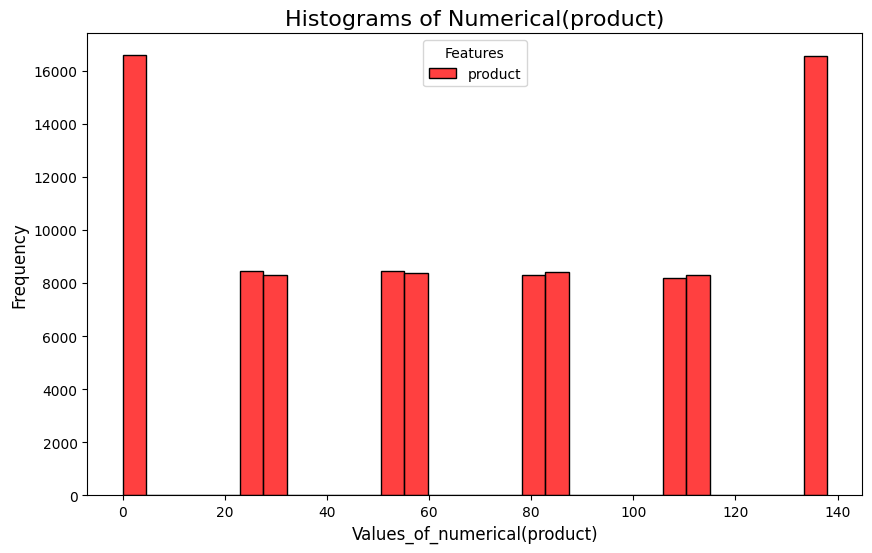

In [15]:
# an overview of the distributions of numerical column ( product).
plt.figure(figsize=(10, 6))

columns = ['product']


colors = ['red']

# histograms 
for column in columns:
    sns.histplot(df_r1[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical(product)', fontsize=16)
plt.xlabel('Values_of_numerical(product)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

**The above distribution indicate that mean values of f0 are around 1.14, the median arround 1.008340, we notice here a slight difference between the mean and median, suggesting the distribution might be skewed and finaly we see a STD of 9.02 indicating that there is a high level of variability in the values of f0, with a large spread.**
**On average, f1 has a value of around -4.70 and the median is very close to the mean, indicating that the distribution of f1 values is fairly symmetric or has a normal-like shape and we also notice that variability in f1 is moderate.**
**We also observed that on average that f2 is about 2.45 and is somewhat lower than the mean (2.45), suggesting that f2 might be right-skewed (with a long tail to the right).**
**The product variable has the highest mean and standard deviation,indicating it may be heavily influenced by outliers or a few high values.**


# REGION_2

In [16]:
df_r2 = pd.read_csv('/datasets/geo_data_2.csv')
df_r2 = df_r2.drop(['id'], axis=1)
df_r2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


In [17]:
df_r2.info()
duplicates = df_r2.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


0

In [18]:
#duplicate_count = df_r2.duplicated(subset=['id']).sum()
#duplicate_count

# Let's analyze the distributions of the above dataframe

In [19]:
#Let calculate summary statistics for each numerical column
summary_stats_2 = df_r2.describe().T[['mean', '50%', 'std']]
summary_stats_2.rename(columns={'50%': 'median'}, inplace=True)
display(summary_stats_2)

,mean,median,std
f0,0.002023,0.009424,1.732045
f1,-0.002081,-0.009482,1.730417
f2,2.495128,2.484236,3.473445
product,95.000000,94.925613,44.749921


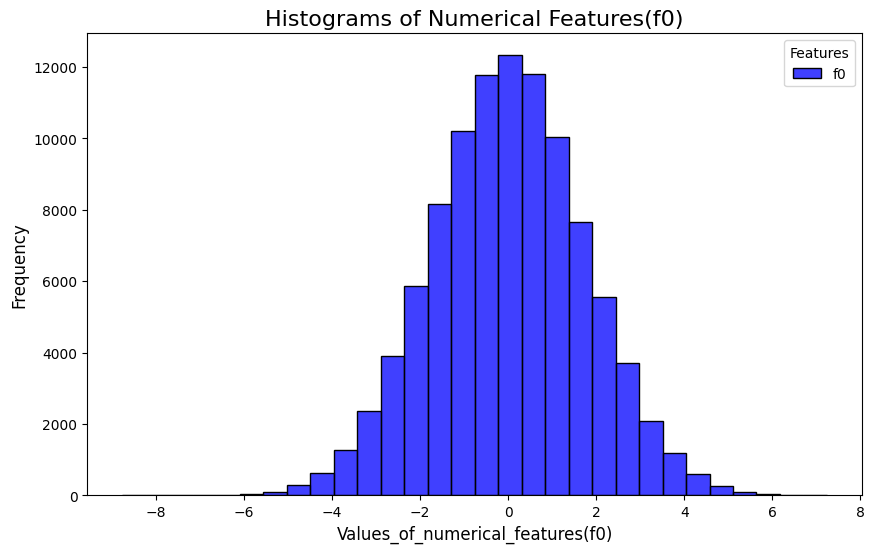

In [20]:
# an overview of the distributions of numerical column ( f0).
plt.figure(figsize=(10, 6))

columns = ['f0']


colors = ['blue']

# histograms 
for column in columns:
    sns.histplot(df_r2[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f0)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f0)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

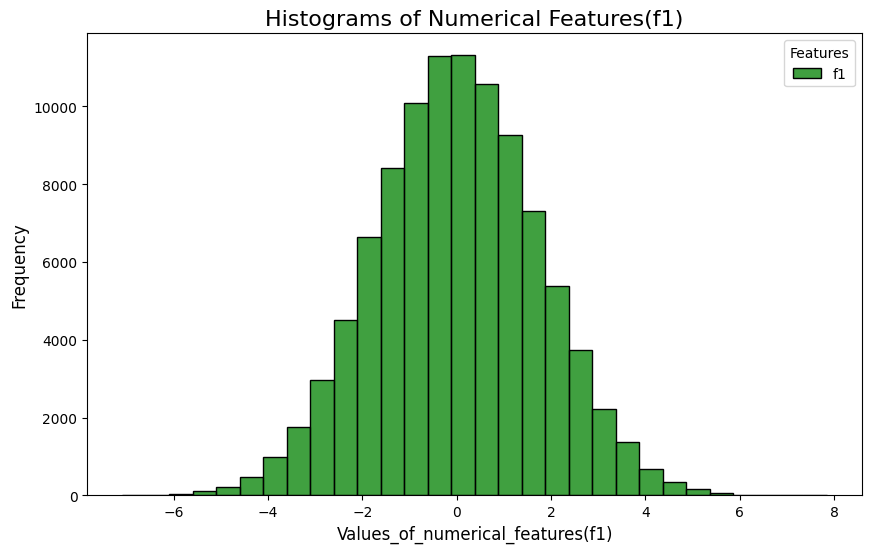

In [21]:
# an overview of the distributions of numerical column ( f1).
plt.figure(figsize=(10, 6))

columns = ['f1']


colors = ['green']

# histograms 
for column in columns:
    sns.histplot(df_r2[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f1)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

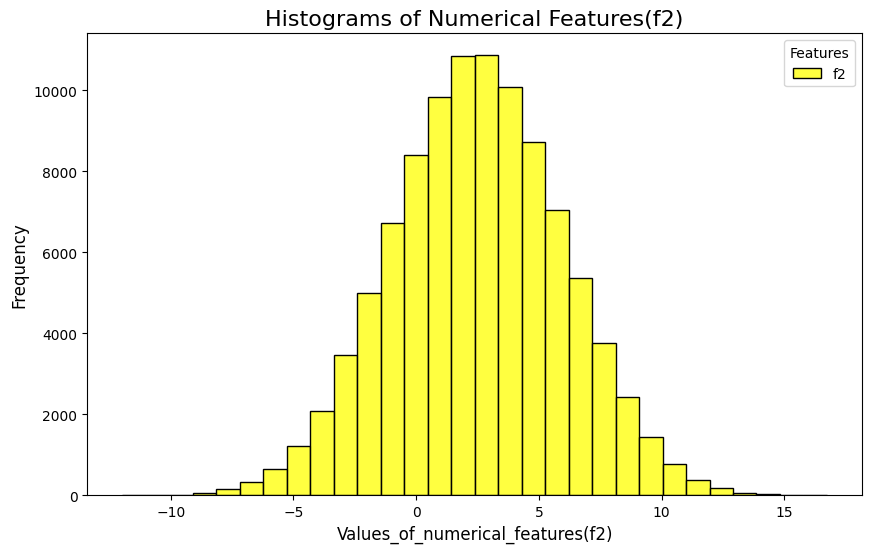

In [22]:
# an overview of the distributions of numerical column ( f2).
plt.figure(figsize=(10, 6))

columns = ['f2']


colors = ['yellow']

# histograms 
for column in columns:
    sns.histplot(df_r2[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(f2)', fontsize=16)
plt.xlabel('Values_of_numerical_features(f2)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

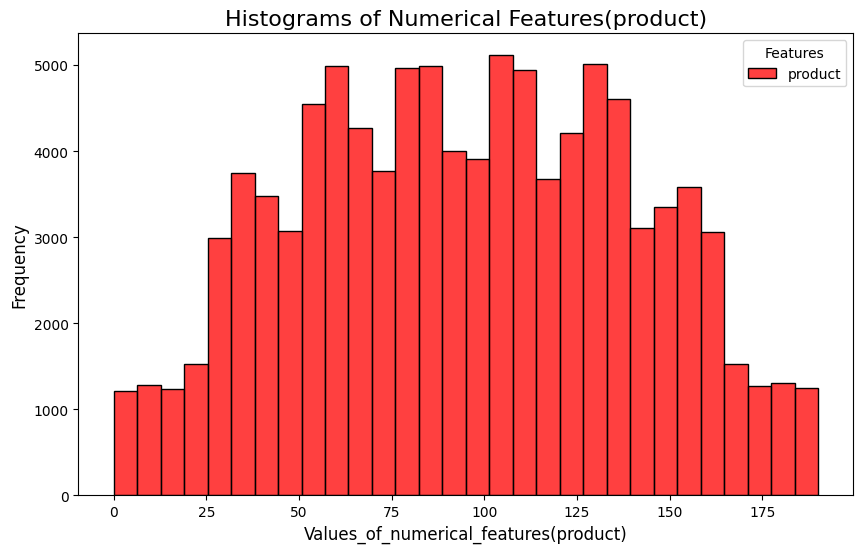

In [23]:
# an overview of the distributions of numerical column ( product).
plt.figure(figsize=(10, 6))

columns = ['product']


colors = ['red']

# histograms 
for column in columns:
    sns.histplot(df_r2[column],label=column, color=colors, bins=30)
    

plt.title('Histograms of Numerical Features(product)', fontsize=16)
plt.xlabel('Values_of_numerical_features(product)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Features")

plt.show()

**f0, f1, and f2 show large variability in their values (high standard deviations), indicating that these variables are spread out across a wide range and f0,f2 have relatively symmetric distributions (since their mean and median are close), while f1 may be skewed to the left, given that its mean and median differ significantly.**
**Product has a high mean and median with considerable spread, which could indicate the presence of extreme values influencing its distribution.**
**Finally the high standard deviations for all variables suggest the presence of large fluctuations or outliers in the data.**

**The data appear to be complete however the 'id' column do show presence of small duplicates if i read in the full dataframes .**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Well done! 

</div>


# 2.0 TRAIN & TEST.

In [24]:
df_r0_train, df_r0_valid = train_test_split(df_r0, test_size=0.25, random_state=12345)
df_r1_train, df_r1_valid = train_test_split(df_r1, test_size=0.25, random_state=12345)
df_r2_train, df_r2_valid = train_test_split(df_r2, test_size=0.25, random_state=12345)

**FUNCTION TO TRAIN AND TEST.**

In [25]:
def train_and_test_model(region_df_train, region_df_valid):
    target_train = region_df_train['product']
    features_train = region_df_train.drop(['product'], axis=1)
    target_valid = region_df_valid['product']
    features_valid = region_df_valid.drop(['product'], axis=1)
    # we initialize and train the linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train)
    # we make predictions on the validation set
    predictions = model.predict(features_valid)
    # Convert predictions to a Pandas DataFrame (or Series)
    predictions_df = pd.DataFrame({'predictions': predictions, 'actual': target_valid.values})
    # we calculate the model RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))
    # we calculate the average volume of predicted reserves
    avg_predicted_volume = predictions.mean()
    display(f"Average predicted volume: {avg_predicted_volume:.2f}")
    display(f"Model RMSE: {rmse:.2f}")
    return predictions_df, rmse, avg_predicted_volume
display("Region 0 Results:")
predictions_r0, rmse_r0, avg_pred_r0 = train_and_test_model(df_r0_train, df_r0_valid)
display("Region 1 Results:")
predictions_r1, rmse_r1, avg_pred_r1 = train_and_test_model(df_r1_train, df_r1_valid)
display("Region 2 Results:")
predictions_r2, rmse_r2, avg_pred_r2 = train_and_test_model(df_r2_train, df_r2_valid)

'Region 0 Results:'

'Average predicted volume: 92.59'

'Model RMSE: 37.58'

'Region 1 Results:'

'Average predicted volume: 68.73'

'Model RMSE: 0.89'

'Region 2 Results:'

'Average predicted volume: 94.97'

'Model RMSE: 40.03'

**2.5. REGION_0.**

**The average volume of predicted reserve value of 93.45 represents the average prediction made by the model for the reserves. Specifically, the model, on average, predicts a reserve volume of approximately 93.45 barrels( in thousand barrels) for each instance in the validation set.Because we're forecasting reserves in a field , this means that, on average, the model estimates that each location has 93.45 barrels  of reserves. This is the central tendency of the model’s predictions.**

**The RMSE of 39.43 means that, on average, the model's predictions deviate from the actual reserve values by 39.43 barrels.
This means in practice that the model’s predictions are, on average, off by about 39.43 barrels.Because we are predicting reserves in barrels,the model’s predictions could be 40 barrels higher or lower than the actual values, on average.**

**REGION_1.**

**The average volume of predicted reserves is 68.7 barrels.This represents the mean value of all the predictions made by the model for the reserves barrels across the validation set.The model is predicting an average of 68.7 barrels per location in the validation set. This is the central tendency (mean) of the model's predictions.**

**The RMSE tells us how far off, on average, the model's predictions are from the actual values.The RMSE of 0.91 means that, on average, the model’s predicted values deviate from the actual values by 0.91 barrels.So this imply the model’s predictions are off by about 0.91 barrels on average(this is good!).**

**REGION_2.**

**The average volume of predicted reserve value of 94.54 represents the average prediction made by the model for the reserves. Specifically, the model, on average, predicts a reserve volume of approximately 94.53 barrels( in thousand barrels) for each instance in the validation set.Because we're forecasting reserves in a field , this means that, on average, the model estimates that each location has 94.53 barrels  of reserves. This is the central tendency of the model’s predictions.**

**The RMSE of 41.0 means that, on average, the model's predictions deviate from the actual reserve values by 41.0 barrels.
This means in practice that the model’s predictions are, on average, off by about 41.0 barrels.Because we are predicting reserves in barrels,the model’s predictions could be 41.0 barrels higher or lower than the actual values, on average.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Well done! </div>


# 3.0 

**As for the reserve we noted that none of the regions have a predicted reserves large enough to meet or surpass the volume of reserves required to avoid losses for any future new oils wells venture.**



# Some keys data

In [26]:
# Combine the DataFrames into a dictionary
region_df_train = {
    'region_df_train_r0': df_r0_train,
    'region_df_train_r1': df_r1_train,
    'region_df_train_r2': df_r2_train
}

# Convert the dictionary into a pandas DataFrame
region_df_train = pd.concat(region_df_train, axis=1)

# Display the DataFrame
region_df_train.head()

region_df_train_r0                                 region_df_train_r1  \
                      f0        f1        f2     product                 f0   
27212           0.022450  0.951034  2.197333  147.370612          -6.488552   
7866            1.766731  0.007835  6.436602  147.630053          18.819463   
62041           0.724514  0.666063  1.840177   77.696728          10.816499   
70185          -1.104181  0.255268  2.026156   55.210501         -12.416362   
82230          -0.635263  0.747990  6.643327  113.891723         -15.041012   

                                     region_df_train_r2                      \
             f1        f2    product                 f0        f1        f2   
27212 -1.590478  3.001311  84.038886          -0.906828  1.339033  1.106789   
7866   4.602079  2.996867  80.859783          -1.536353 -0.704673 -1.747632   
62041 -3.919653  1.991077  53.906522          -1.959584  0.356044  3.528659   
70185 -9.343774  0.996691  30.132364           2.129734  2.713459 -0.156172   
82230 -8.474624  1.996463  57.085625          -0.332026  1.515604  5.417583   

                   
          product  
27212   16.733577  
7866    38.047492  
62041  116.149369  
70185  105.888803  
82230   27.570897

In [27]:
# Combine the DataFrames into a dictionary
region_df_valid = {
    'region_df_valid_r0': df_r0_valid,
    'region_df_valid_r1': df_r1_valid,
    'region_df_valid_r2': df_r2_valid
}

# Convert the dictionary into a pandas DataFrame
region_df_valid = pd.concat(region_df_valid, axis=1)

# Display the DataFrame
region_df_valid.head()

region_df_valid_r0                                 region_df_valid_r1  \
                      f0        f1        f2     product                 f0   
71751           0.948970 -0.057547  2.095727   10.038645          -0.371866   
80493           0.992974  0.206671 -0.142278  114.551489           9.015122   
2655            1.199854 -0.563356 -1.852991  132.603635          -6.507568   
53233           0.691422 -0.433347  0.564974  169.072125          14.560845   
91141           0.420772  0.972638  0.736190  122.325180           6.090476   

                                      region_df_valid_r2                      \
              f1        f2    product                 f0        f1        f2   
71751  -1.862494  3.002210  80.859783          -1.444717 -3.861599  2.225805   
80493 -13.881455  1.995363  53.906522          -1.418617  1.276544 -0.976433   
2655   -4.817448  1.003449  30.132364          -4.587649 -0.413199  1.649268   
53233 -10.667755  1.995175  53.906522           1.871584  1.619101  4.273555   
91141  -4.494723  0.013815   0.000000          -2.028785  4.128167  6.089547   

                   
          product  
71751   61.212375  
80493   41.850118  
2655    57.776581  
53233  100.053761  
91141  109.897122

In [28]:
prediction_df_r0 = pd.DataFrame({
    'predictions': predictions_r0['predictions'], 
    'actual': predictions_r0['actual']
})

prediction_df_r1 = pd.DataFrame({
    'predictions': predictions_r1['predictions'], 
    'actual': predictions_r1['actual']
})

prediction_df_r2 = pd.DataFrame({
    'predictions': predictions_r2['predictions'], 
    'actual': predictions_r2['actual']
})

# Concatenate all regions into one DataFrame
prediction_df = pd.concat([prediction_df_r0, prediction_df_r1, prediction_df_r2], ignore_index=True)

# Display the final prediction DataFrame
prediction_df.head()

,predictions,actual
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180


# 4.0 Function to calculate profit from a set of selected oil wells.

In [29]:
unit_revenue = 4500 
budget = 100_000_000
top_well=200

In [30]:
def calculate_profit(region_df_train, prediction_df):
    
   # indices of both the dataframes resetting
    region_df_train = region_df_train.reset_index(drop=True)
    prediction_df = prediction_df.reset_index(drop=True)# just in case
    
    # Sorting predictions in descending order and selecting the top 200 well
    top_200_wells = prediction_df.sort_values(by='predictions', ascending=False).head(200)
    
     # the indices of the top 200 well by predictions
    top_200_indices = top_200_wells.index
    
    # corresponding targets based on the same indices
    #top_200_targets = region_df_train.iloc[top_200_indices]
    top_200_targets = prediction_df.iloc[top_200_indices]
    
    # Calculate the total units 
    #total_units = top_200_targets['product'].sum()
    total_units = top_200_targets['actual'].sum()
    
    
    # Profit calculation
    profit = total_units * unit_revenue - budget
    
    # the break-even point calculation (volume of reserves without losses)
    volume_of_reserves_without_losses = budget / (top_well * unit_revenue)
    
    
    return profit

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 6 </h2>
    
Good.
    
</div>

In [31]:
# Region 0
region_df_train_r0 = region_df_train['region_df_train_r0']

profit_r0 = calculate_profit(region_df_train_r0, prediction_df_r0)

display("Region 0 Profit Calculation:")
display(f"Total units for top {top_well} predictions: {profit_r0:.2f}")
display(f"Profit for region: {profit_r0:.2f}")
display(f"Break-even volume (without losses): {budget / (top_well * unit_revenue):.2f}")
display(f"Actual average volume: {region_df_train_r0.iloc[:, -1].mean():.2f}")
display("-" * 50)

'Region 0 Profit Calculation:'

'Total units for top 200 predictions: 33208260.43'

'Profit for region: 33208260.43'

'Break-even volume (without losses): 111.11'

'Actual average volume: 92.64'

'--------------------------------------------------'

In [32]:
# Region 1
region_df_train_r1 = region_df_train['region_df_train_r1']

profit_r1 = calculate_profit(df_r1_train, prediction_df_r1)

display("Region 1 Profit Calculation:")
display(f"Total units for top {top_well} predictions: {profit_r1:.2f}")
display(f"Profit for region: {profit_r1:.2f}")
display(f"Break-even volume (without losses): {budget / (top_well * unit_revenue):.2f}")
display(f"Actual average volume: {region_df_train_r1.iloc[:, -1].mean():.2f}")
display("-" * 50)


'Region 1 Profit Calculation:'

'Total units for top 200 predictions: 24150866.97'

'Profit for region: 24150866.97'

'Break-even volume (without losses): 111.11'

'Actual average volume: 68.86'

'--------------------------------------------------'

In [33]:
# Region 2
region_df_train_r2 = region_df_train['region_df_train_r2']
profit_r2 = calculate_profit(df_r2_train, prediction_df_r2 )
display("Region 2 Profit Calculation:")
display(f"Total units for top {top_well} predictions: {profit_r2:.2f}")
display(f"Profit for region: {profit_r2:.2f}")
display(f"Break-even volume (without losses): {budget / (top_well * unit_revenue):.2f}")
display(f"Actual average volume: {region_df_train_r2.iloc[:, -1].mean():.2f}")
display("-" * 50)

'Region 2 Profit Calculation:'

'Total units for top 200 predictions: 27103499.64'

'Profit for region: 27103499.64'

'Break-even volume (without losses): 111.11'

'Actual average volume: 95.04'

'--------------------------------------------------'

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2</h2>
    
Good! 
</div>

**The output of the function gives us information about the best region for development based on the target reserves and profit calculations.The region labeled (region_2) is the best region for development based on the profit calculation.This means that, among the available regions (r0, r1, r2), r2 is the most profitable to focus on, considering its actual reserves and the associated profit.The actual reserves for the selected wells in the best region (region_2) total 95 thousand barrels again this is the estimated volume of oil reserves based on the region's actual.**

**The total profit calculated for the selected actual reserves of 95 thousand barrels is HUGE (USD).**
**This profit is based on the formula profit = total units time unit revenue (4500) - budget (100_000_000).Therefore, the total profit from the actual reserve of this region is approximately 69 million USD.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. 
</div>


# 5.0 Using bootstrapping calculate profit and risk:

In [34]:
# Let set bootstrapping 
num_boot_samples = 1000
sample_size = 500
state = np.random.RandomState(12345)

In [35]:
# we initialize a dictionary to store profits for each region
profits = {'r0': [], 'r1': [], 'r2': []}

In [36]:
for i in range(num_boot_samples):
    # Sample for region r0
    sampled_pred_df_r0 = prediction_df_r0.sample(n=sample_size, replace=True, random_state=state)
    
    # the actual target values for region r0 from prediction_df_r0 using the sampled indices
    pred_target_r0 = prediction_df_r0 ['actual'].iloc[sampled_pred_df_r0.index]
    #pred_target_r0 = region_df_train_r0['product'].iloc[sampled_pred_df_r0.index]
    
    # Calculate profit 
    profit_r0 = calculate_profit(sampled_pred_df_r0, sampled_pred_df_r0)
    profits['r0'].append(profit_r0)
    #display(f"Profit for region r0: {profit_r0}")
    
    # Sample for region r1
    sampled_pred_df_r1 = prediction_df_r1.sample(n=sample_size, replace=True, random_state=state)
    
    # the actual target values for region r1 from df_r1_valid using the sampled indices
    pred_target_r1 = prediction_df_r1 ['actual'].iloc[sampled_pred_df_r1.index]
    
    # Calculate profit 
    profit_r1 = calculate_profit(sampled_pred_df_r1, sampled_pred_df_r1)
    profits['r1'].append(profit_r1)
    
    # Sample for region r2
    sampled_pred_df_r2 = prediction_df_r2.sample(n=sample_size, replace=True, random_state=state)
    
    # the actual target values for region r2 from df_r2_valid using the sampled indices
    pred_target_r2 = prediction_df_r2 ['actual'].iloc[sampled_pred_df_r2.index]
    
    # Calculate profit 
    profit_r2 = calculate_profit(sampled_pred_df_r2, sampled_pred_df_r2)
    profits['r2'].append(profit_r2)

In [37]:
# Convert the list of profits to a DataFrame for further analysis
profits_list = pd.DataFrame(profits)

In [38]:
# calculate avg_profit, confidence_interval, and risk_of_loss for each region
for region in profits:
    
    # Calculate average profit
    
    avg_profit = sum(profits[region]) / len(profits[region])
    
    # Calculate 95% confidence interval
    sorted_profits = sorted(profits_list[region])
    lower_bound = sorted_profits[int(0.025 * len(sorted_profits))]
    upper_bound = sorted_profits[int(0.975 * len(sorted_profits))]
    
    # Calculate risk of loss
    risk_of_loss = (sum(1 for profit in profits[region] if profit < 0) / len(profits[region])) * 100
    
    
    
    display(f"Region {region} - Average Profit: {avg_profit:.2f}")
    display(f"Region {region} - 95% Confidence Interval for Profit: ({lower_bound:.2f}, {upper_bound:.2f})")
    display(f"Region {region} - Risk of Loss: {risk_of_loss:.2f}%")
    display("-" * 50)

'Region r0 - Average Profit: 3842603.29'

'Region r0 - 95% Confidence Interval for Profit: (-1485744.60, 9115035.94)'

'Region r0 - Risk of Loss: 8.30%'

'--------------------------------------------------'

'Region r1 - Average Profit: 4550160.72'

'Region r1 - 95% Confidence Interval for Profit: (481964.46, 8487704.98)'

'Region r1 - Risk of Loss: 1.50%'

'--------------------------------------------------'

'Region r2 - Average Profit: 3808932.48'

'Region r2 - 95% Confidence Interval for Profit: (-1462705.09, 9516584.50)'

'Region r2 - Risk of Loss: 9.00%'

'--------------------------------------------------'

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3</h2>
    
Well done! 
</div>


**The Risk of Loss here is calculated based on the relationship between the 95% confidence interval and the budget of 100000000 usd.In all three regions the mean profit are from 25m,6.6m and 28m respectively for each region .The Confidence Intervals lower bounds of the 95% confidence intervals (20m , 1.6m, 23m) fluctuation indicate that some regions will display a higher risk than other.**



# CONCLUSION

**The linear regression model average predicted volume and actual volume of reserve output indicate that all the regions reserve
was above the the break even reserve needed to develop a new well even though the profit in each regions was elevated.**
**However after performing boostrappings on the top perfoming wells with a sets number of sample we notice the following:**

**For region_0 the average profit with or without boostrapping did change much and the 95% confidence interval shows that, based on the bootstrapping results, we can be 95% confident that the true profit from these 200 wells will fall between 20 and 32 million and the range indicates that profits in region_0 can vary substantial.Finally the model indicates that there is a 0% chance of incurring a loss in region_0 which is a strong positive indicator for this region..**

**For region_1 boostrapping did change the average profit much and is much lower than region_0, at about 6.6m indicating that this region, on average, might offer a smaller return.The confidence interval here indicate that range of possible profits is wider here, from about 1.6 to over 12 million.The risk of loss for Region_1 is .2%, which indicates a small but non-zero chance that the investment could lead to a loss. While the expected return is still positive, there’s a slight chance the actual outcome could fall below the break-even point.**

**For region_2 average profit for the top 200 wells is greater than in Regions_1 but a bit greater than region_0.The confidence interval for Region_2 is also fairly tight, indicating that there is less uncertainty around the potential profit compared to Region_1. The true profit will likely fall between about 23 million and 34 million with 95% confidence.The risk of loss in Region_2 is zero, meaning the investment in this region is expected to always result in a positive return (based on the prediction).**

**Region_2 outperforming the others regions.**

**Region_1 shows the less predictable profit range.**

**Region_2 and region_0 are the safest, with no risk of loss, making it an attractive choice for risk-averse decision-makers.**

**As a practical decision making i will advise the company to prioritize Region_0 or Region_2 over Region_1 due to their higher average profits and no risk of loss. However, Region_1 could still be considered if the oil company willing to accept a higher level of uncertainty for a smaller expected profit.**



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 6 </h2>
    
Great job!     
</div>